In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [0]:
df = pd.read_csv('/content/classification-table.txt')  # το path για να διαβάσουμε το table
df.drop(['Unnamed: 0'],axis=1,inplace=True)
X = df.drop('plan',axis=1)
y = df['plan']

from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test =train_test_split(X, y, test_size=0.2) # split τα tables 

In [38]:
df.head(2)

,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,brand,southern_europe,western_europe,northern_europe,central_eastern_europe,age
0,0,0,1.0,1.0,3,1,1,0,0,0,28
1,1,0,0.0,1.0,75,1,0,0,0,0,35


<li> <b> KNeighborsClassifier </b> </li>

In [39]:

from sklearn.neighbors import KNeighborsClassifier

                                         # import την SMOTE που θα μας κάνει το oversampling 
                                         # δηλαδή θα μας κάνει ι΄σάριθμες τις κλάσεις μας



sc = StandardScaler()
var = VarianceThreshold()
sampler = SMOTE()
mdl = KNeighborsClassifier()




pipes = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', mdl)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
         'model__n_neighbors': [5, 10, 15 ,20]}

clf= GridSearchCV(pipes,grid1,cv=3,verbose=10,n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   13.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                       ('mode

In [40]:
from sklearn.metrics import classification_report
print(clf.best_params_, '\n')

print(classification_report(y_test, clf.predict(X_test)))

{'model__n_neighbors': 5, 'selector__threshold': 0.2} 

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2882
           1       0.14      0.44      0.22       227

    accuracy                           0.77      3109
   macro avg       0.54      0.62      0.54      3109
weighted avg       0.89      0.77      0.81      3109



[[2280  127]
 [ 602  100]]


Text(48.5, 0.5, 'Actual classes')

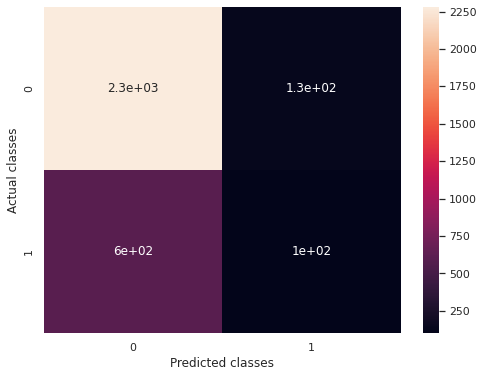

In [41]:
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(8,6)})
cfm = confusion_matrix(clf.predict(X_test), y_test.values)
sns.heatmap(cfm, annot=True)
print(cfm)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

<li><b> RandomForestClassifier </b></li>

In [35]:
from sklearn.ensemble import RandomForestClassifier

sc = StandardScaler()
var = VarianceThreshold()
sampler = SMOTE()
mdl = RandomForestClassifier()




pipes = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', mdl)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
         'model__n_estimators': [20, 40, 60 ,80,100]}

clf= GridSearchCV(pipes,grid1,cv=3,verbose=10,n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   36.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [42]:
from sklearn.metrics import classification_report
print(clf.best_params_, '\n')

print(classification_report(y_test, clf.predict(X_test)))

{'model__n_neighbors': 5, 'selector__threshold': 0.2} 

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2882
           1       0.14      0.44      0.22       227

    accuracy                           0.77      3109
   macro avg       0.54      0.62      0.54      3109
weighted avg       0.89      0.77      0.81      3109



<li><b> DecisionTreeClassifier </b> </li>

In [43]:
from sklearn.tree import DecisionTreeClassifier

                                         # import την SMOTE που θα μας κάνει το oversampling 
                                         # δηλαδή θα μας κάνει ι΄σάριθμες τις κλάσεις μας



sc = StandardScaler()
var = VarianceThreshold()
sampler = SMOTE()
mdl = DecisionTreeClassifier()




pipes = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', mdl)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
         'model__criterion': ['gini', 'splitter'],
         'model__max_depth':[10,100,1000,2000]
         
         }

clf= GridSearchCV(pipes,grid1,cv=3,verbose=10,n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1615s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    5.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [44]:
from sklearn.metrics import classification_report
print(clf.best_params_, '\n')

print(classification_report(y_test, clf.predict(X_test)))

{'model__criterion': 'gini', 'model__max_depth': 100, 'selector__threshold': 0} 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2882
           1       0.19      0.24      0.21       227

    accuracy                           0.87      3109
   macro avg       0.56      0.58      0.57      3109
weighted avg       0.88      0.87      0.88      3109



<li> <b>Naive Bayes </b></li>

In [45]:
from sklearn.naive_bayes import GaussianNB


sc = StandardScaler()
var = VarianceThreshold()
sampler = SMOTE()
mdl = GaussianNB()




pipes = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', mdl)])

grid1 = {'selector__threshold': [0, 0.2, 0.4]
         
         
         }

clf= GridSearchCV(pipes,grid1,cv=3,verbose=10,n_jobs=-1)
clf.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1426s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                          

In [46]:
from sklearn.metrics import classification_report
print(clf.best_params_, '\n')

print(classification_report(y_test, clf.predict(X_test)))

{'selector__threshold': 0} 

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      2882
           1       0.13      0.59      0.22       227

    accuracy                           0.69      3109
   macro avg       0.55      0.65      0.51      3109
weighted avg       0.90      0.69      0.76      3109



<li> <b> MLPClassifier </b> </li>

In [47]:
from sklearn.neural_network import MLPClassifier


sc = StandardScaler()
var = VarianceThreshold()
sampler = SMOTE()
mdl = MLPClassifier()




pipes = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', mdl)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
          'model__hidden_layer_sizes': [[100], [50], (200,) ],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate_init': [0.0001, 0.001],
    'model__solver': ['sgd', 'adam']
         
         
         }

clf= GridSearchCV(pipes,grid1,cv=3,verbose=10,n_jobs=-1)
clf.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 21

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [48]:
from sklearn.metrics import classification_report
print(clf.best_params_, '\n')

print(classification_report(y_test, clf.predict(X_test)))

{'model__activation': 'relu', 'model__hidden_layer_sizes': (200,), 'model__learning_rate_init': 0.0001, 'model__solver': 'sgd', 'selector__threshold': 0.2} 

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2882
           1       0.18      0.56      0.27       227

    accuracy                           0.78      3109
   macro avg       0.57      0.68      0.57      3109
weighted avg       0.90      0.78      0.83      3109



In [49]:
from sklearn.linear_model import LogisticRegression 


sc = StandardScaler()
var = VarianceThreshold()
sampler = SMOTE()
mdl = LogisticRegression()




pipes = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', mdl)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
         
    'model__C': [0,4,10]


         
         
         }

clf= GridSearchCV(pipes,grid1,cv=3,verbose=10,n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1492s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [50]:
from sklearn.metrics import classification_report
print(clf.best_params_, '\n')

print(classification_report(y_test, clf.predict(X_test)))

{'model__C': 10, 'selector__threshold': 0.2} 

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2882
           1       0.17      0.57      0.26       227

    accuracy                           0.76      3109
   macro avg       0.56      0.68      0.56      3109
weighted avg       0.90      0.76      0.82      3109

